In [79]:

#importing required libraries
from skimage.io import imread, imshow
from skimage.transform import resize
from skimage.feature import hog
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
import os
import numpy as np
import glob
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn import metrics

#Hog descriptor code adapted from https://www.analyticsvidhya.com/blog/2019/09/feature-engineering-images-introduction-hog-feature-descriptor/
#Cat dataset from https://www.kaggle.com/crawford/cat-dataset
#Random images dataset: https://www.kaggle.com/hsankesara/flickr-image-dataset


In [3]:
#Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Demo on how Histogram of gradients can be used to extract features from an image**

(1024, 725, 3)


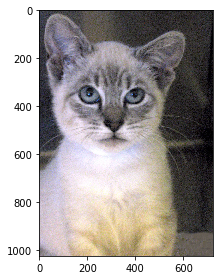

In [5]:
#reading the image
img = imread('/content/drive/MyDrive/Documents/MM 803/cat.jpg')
imshow(img)
print(img.shape)

(128, 64, 3)


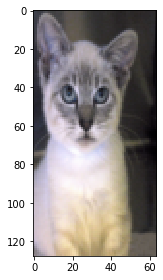

In [6]:
#resizing image 
resized_img = resize(img, (128,64)) 
imshow(resized_img) 
print(resized_img.shape)

In [7]:
#creating hog features 
fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                    cells_per_block=(2, 2), visualize=True, multichannel=True)


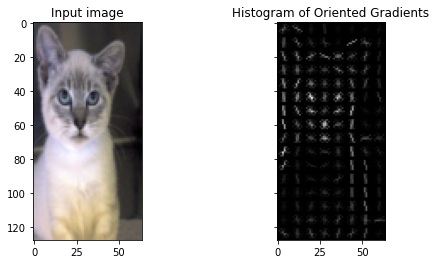

In [10]:
#Displaying the results of HOG
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 4), sharex=True, sharey=True) 

ax1.imshow(resized_img, cmap=plt.cm.gray) 
ax1.set_title('Input image') 

# Rescale histogram for better display 
hog_image_rescaled = exposure.rescale_intensity(hog_image, in_range=(0, 10)) 

ax2.imshow(hog_image_rescaled, cmap=plt.cm.gray) 
ax2.set_title('Histogram of Oriented Gradients')

plt.show()

**Using HOG to extract features from our dataset**

In [30]:
#Running HOG descriptor for all cat images to find the features of our positive examples
#No of images = 1618
#No of features per image= 3780
#Approx run time= 4 mins

os.chdir("/content/drive/MyDrive/Documents/MM 803/Cats/CAT_01")
file_names=[]
for file in glob.glob("*.jpg"):
    file_names.append(file)


features_array=np.zeros((len(file_names),3780))


for i in range(0,len(file_names)):

  img = imread(f'/content/drive/MyDrive/Documents/MM 803/Cats/CAT_01/{file_names[i]}')
  resized_img = resize(img, (128,64))
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                      cells_per_block=(2, 2), visualize=True, multichannel=True) 
  
  features_array[i]=fd

print(features_array.shape)

(1618, 3780)
(1618, 3780)


In [35]:
#Generating column names for our dataframe

feature_columns=[]
for i in range(1,features_array.shape[1] +1):
  feature_columns.append(f"Feature {i}")
print(len(feature_columns))

3780


In [39]:
#Generating the dataframe for positive examples
df1=pd.DataFrame(data=features_array, index=file_names,columns=feature_columns)


In [50]:
#Creating labels for cats(true)
labels=[1 for i in range(0,len(file_names))]
df1['labels']=labels


In [51]:
print(df1)

                  Feature 1  Feature 2  ...  Feature 3780  labels
00000100_003.jpg   0.241741   0.135913  ...      0.261361       1
00000100_002.jpg   0.104465   0.182718  ...      0.052756       1
00000102_019.jpg   0.194345   0.141231  ...      0.085910       1
00000102_010.jpg   0.334815   0.019607  ...      0.218067       1
00000102_013.jpg   0.354661   0.000000  ...      0.178059       1
...                     ...        ...  ...           ...     ...
00000296_027.jpg   0.225405   0.125439  ...      0.359898       1
00000296_022.jpg   0.237653   0.131811  ...      0.021026       1
00000296_015.jpg   0.056294   0.048526  ...      0.365462       1
00000296_013.jpg   0.056996   0.005019  ...      0.055596       1
00000296_014.jpg   0.051244   0.013978  ...      0.131453       1

[1618 rows x 3781 columns]


In [ ]:
#Running HOG descriptor for all cat images to find the features of our positive examples
#No of images = 1618
#No of features per image= 3780
#Approx run time= 4 mins

os.chdir("/content/drive/MyDrive/Documents/MM 803/Random")
random_file_names=[]
for file in glob.glob("*.jpg"):
    random_file_names.append(file)


random_features_array=np.zeros((len(random_file_names),3780))


for i in range(0,len(random_file_names)):
  
  img = imread(f'/content/drive/MyDrive/Documents/MM 803/Random/{random_file_names[i]}')
  resized_img = resize(img, (128,64))
  fd, hog_image = hog(resized_img, orientations=9, pixels_per_cell=(8, 8), 
                      cells_per_block=(2, 2), visualize=True, multichannel=True) 
  
  random_features_array[i]=fd

print(random_features_array.shape)

In [43]:
#Generating the dataset for random images
df2=pd.DataFrame(data=random_features_array, index=random_file_names,columns=feature_columns)

In [52]:
#Creating labels for random images
random_labels=[0 for i in range(0,len(random_file_names))]
df2['labels']=random_labels

In [53]:
print(df2)

                Feature 1  Feature 2  ...  Feature 3780  labels
4731681353.jpg   0.235326   0.040912  ...      0.178330       0
4731609129.jpg   0.304547   0.167709  ...      0.227749       0
4731413904.jpg   0.273859   0.267756  ...      0.016109       0
4731580287.jpg   0.177878   0.137487  ...      0.331939       0
4731305489.jpg   0.036029   0.026853  ...      0.092863       0
...                   ...        ...  ...           ...     ...
4848645410.jpg   0.253079   0.253079  ...      0.187821       0
4848644668.jpg   0.227918   0.059226  ...      0.138868       0
4848511967.jpg   0.284800   0.000000  ...      0.259943       0
4848505381.jpg   0.283103   0.036541  ...      0.193367       0
4848391416.jpg   0.306187   0.051167  ...      0.014845       0

[1330 rows x 3781 columns]


In [54]:
#Concating both dataframes to create our combined dataset for classification
frames = [df1, df2]
  
result = pd.concat(frames)
print(result)

                  Feature 1  Feature 2  ...  Feature 3780  labels
00000100_003.jpg   0.241741   0.135913  ...      0.261361       1
00000100_002.jpg   0.104465   0.182718  ...      0.052756       1
00000102_019.jpg   0.194345   0.141231  ...      0.085910       1
00000102_010.jpg   0.334815   0.019607  ...      0.218067       1
00000102_013.jpg   0.354661   0.000000  ...      0.178059       1
...                     ...        ...  ...           ...     ...
4848645410.jpg     0.253079   0.253079  ...      0.187821       0
4848644668.jpg     0.227918   0.059226  ...      0.138868       0
4848511967.jpg     0.284800   0.000000  ...      0.259943       0
4848505381.jpg     0.283103   0.036541  ...      0.193367       0
4848391416.jpg     0.306187   0.051167  ...      0.014845       0

[2948 rows x 3781 columns]


In [55]:
#Shuffling the dataset
shuffled_dataset=result.sample(frac=1)


In [61]:
print(shuffled_dataset)

                  Feature 1  Feature 2  ...  Feature 3780  labels
4809733027.jpg     0.364323   0.167585  ...      0.310796       0
4826375738.jpg     0.257527   0.083081  ...      0.125785       0
00000197_020.jpg   0.261168   0.040287  ...      0.097189       1
4768114318.jpg     0.282616   0.155634  ...      0.243315       0
4822495419.jpg     0.217739   0.123404  ...      0.000000       0
...                     ...        ...  ...           ...     ...
00000291_021.jpg   0.116798   0.067345  ...      0.081753       1
4817681157.jpg     0.209444   0.036628  ...      0.031945       0
00000192_021.jpg   0.018478   0.002073  ...      0.091543       1
00000184_022.jpg   0.380737   0.001875  ...      0.126326       1
00000164_001.jpg   0.214967   0.216897  ...      0.390901       1

[2948 rows x 3781 columns]


**SVM Classification on our dataset**

In [62]:
#Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(shuffled_dataset.iloc[:, 0:3780], shuffled_dataset.labels, test_size=0.3,random_state=44) 



In [82]:
#Create a svm Classifier
clf = svm.SVC(kernel='rbf') 

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [83]:
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.8124293785310734


In [84]:
print("Precision:",metrics.precision_score(y_test, y_pred))

print("Recall:",metrics.recall_score(y_test, y_pred))

Precision: 0.7797619047619048
Recall: 0.8772321428571429
